In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [3]:
X.shape, y.shape

((303, 13), (303, 1))

In [4]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [5]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [6]:
Z = X.fillna({'ca':0.0, 'thal':0.0})

In [7]:
Z.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [8]:
Z.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [9]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [10]:
Z['cp'].value_counts()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64

In [11]:
Z['sex'] = Z.sex.replace({1: "M", 0: "F"})
Z['cp'] = Z.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
Z['exang'] = Z.exang.replace({1: "Y", 0: "N"})
Z['fbs'] = Z.fbs.replace({1: "T", 0: "F"})
Z['slope'] = Z.slope.replace({1: "upsloping", 2: "flat", 3:"downsloping"})
Z['thal'] = Z.thal.replace({3.0:"normal", 6.0: "fixed_defect", 7.0: "reversable_defect"})
Z['restecg'] = Z.restecg.replace({0: "normal", 1: "ST-T wave abnormality", 2: "showing probable or definite left ventricular hypertrophy"})
Z

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,M,typical_angina,145,233,T,showing probable or definite left ventricular ...,150,N,2.3,downsloping,0.0,fixed_defect
1,67,M,asymtomatic,160,286,F,showing probable or definite left ventricular ...,108,Y,1.5,flat,3.0,normal
2,67,M,asymtomatic,120,229,F,showing probable or definite left ventricular ...,129,Y,2.6,flat,2.0,reversable_defect
3,37,M,non-anginal pain,130,250,F,normal,187,N,3.5,downsloping,0.0,normal
4,41,F,atypical_angina,130,204,F,showing probable or definite left ventricular ...,172,N,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,M,typical_angina,110,264,F,normal,132,N,1.2,flat,0.0,reversable_defect
299,68,M,asymtomatic,144,193,T,normal,141,N,3.4,flat,2.0,reversable_defect
300,57,M,asymtomatic,130,131,F,normal,115,Y,1.2,flat,1.0,reversable_defect
301,57,F,atypical_angina,130,236,F,showing probable or definite left ventricular ...,174,N,0.0,flat,1.0,normal


<AxesSubplot:xlabel='age'>

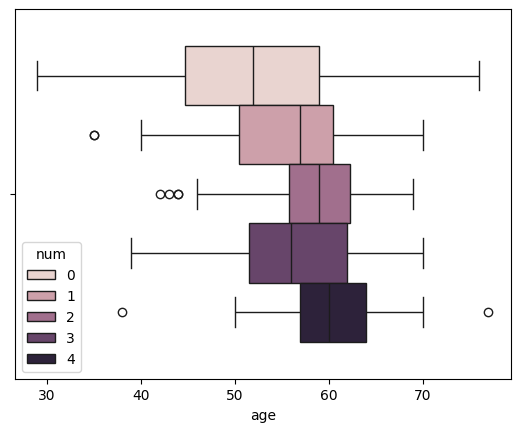

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(Z, x='age', hue=y['num'])

<AxesSubplot:>

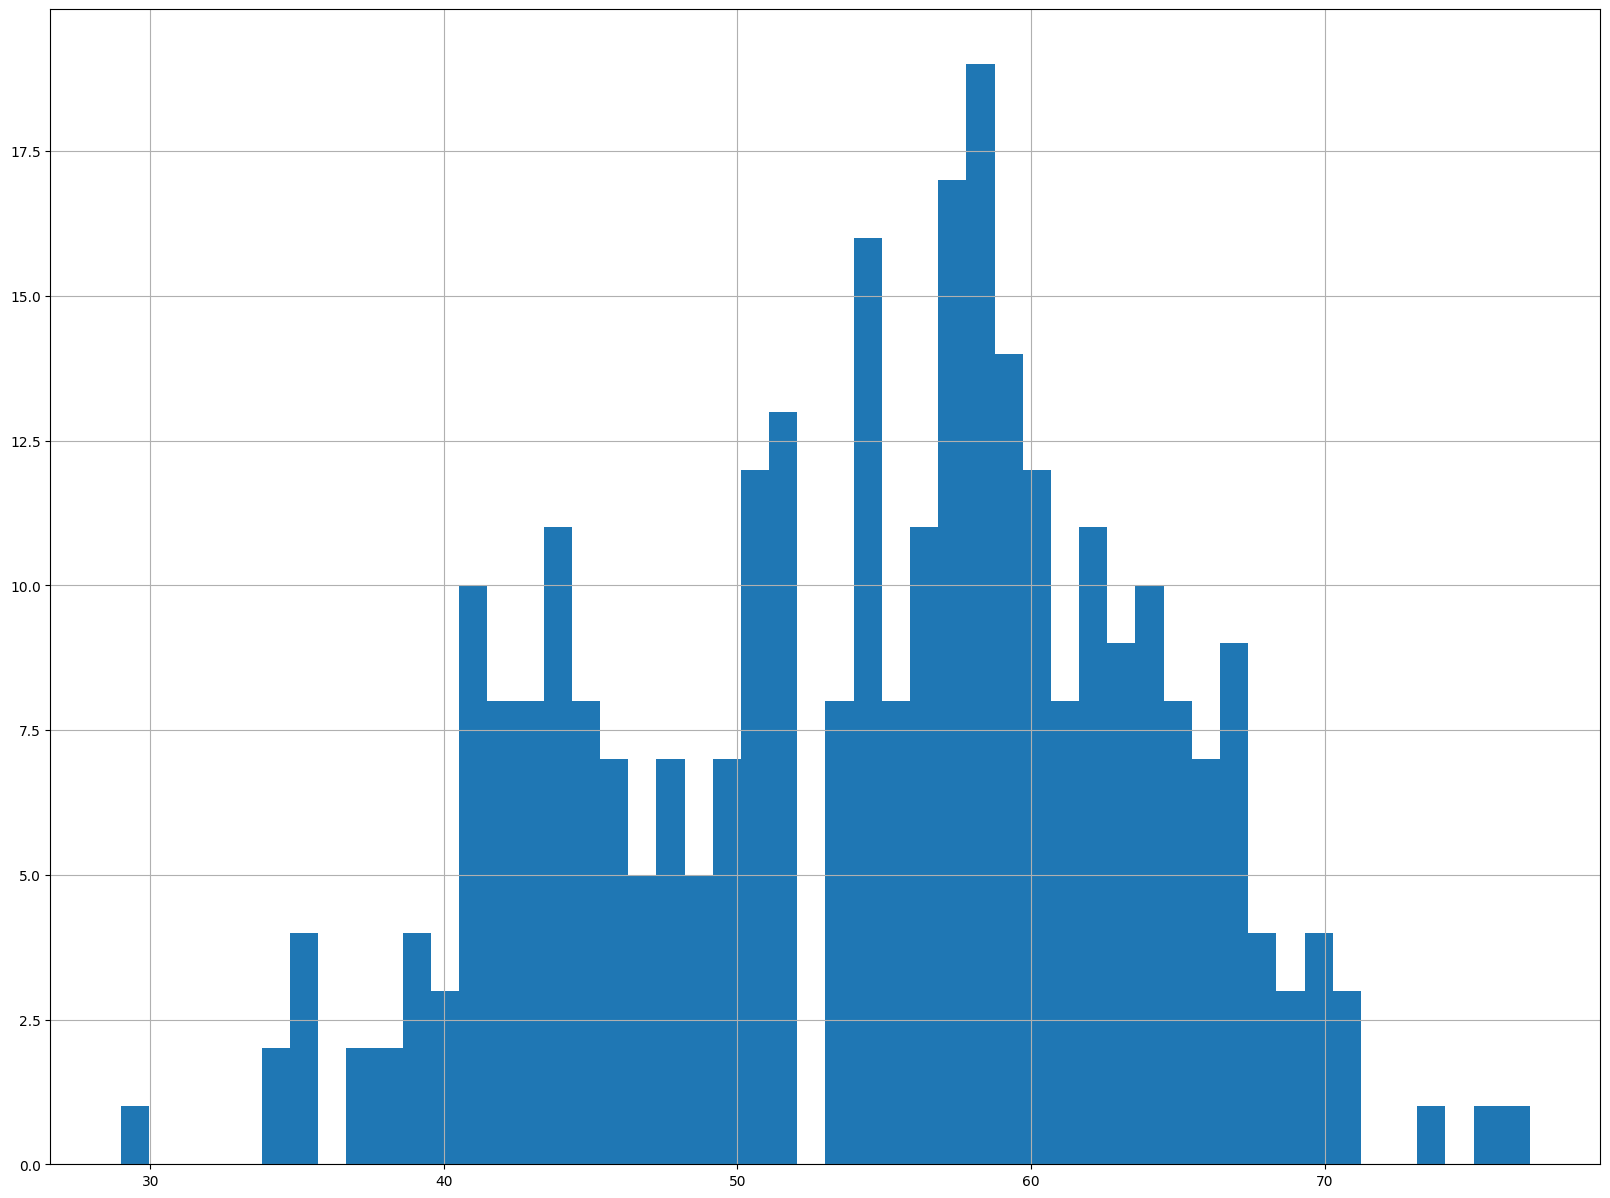

In [13]:
Z['age'].hist(bins = 50, figsize = (20,15))

<AxesSubplot:xlabel='age'>

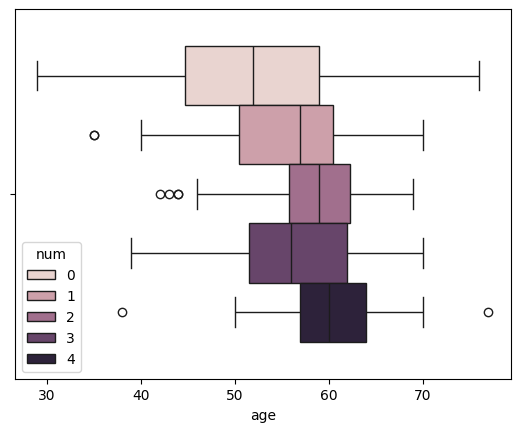

In [14]:
sns.boxplot(data=Z, x='age', hue=y['num'])

<AxesSubplot:xlabel='sex', ylabel='count'>

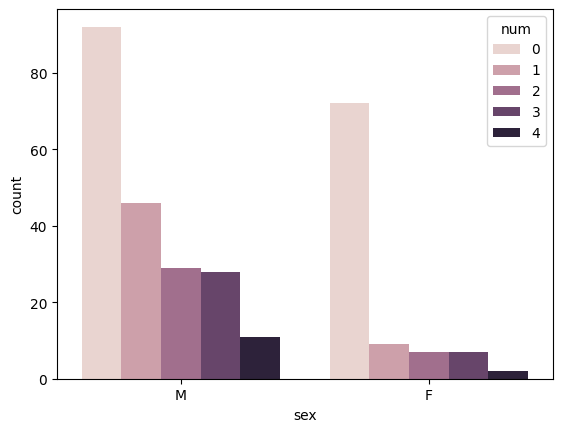

In [15]:
sns.countplot(data=Z, x='sex', hue=y['num'])

In [16]:
def Age_type(Age):
    if Age<30:
        'Very Young'
    elif 30<=Age<41:
        return 'Young'
    elif 41<=Age<53:
        return 'Mid'
    elif 53<=Age<71:
        return 'Elder'
    else:
        return 'Senior'

Z['Age_type'] = Z['age'].apply(Age_type)
Z['Very Young'] = Z['Age_type']=='Very Young'
Z['Young'] = Z['Age_type']=='Young'
Z['Mid'] = Z['Age_type']=='Mid'
Z['Elder'] = Z['Age_type']=='Elder'
Z['Senior'] = Z['Age_type']=='Senior'
Z.drop(['age'], axis=1)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age_type,Very Young,Young,Mid,Elder,Senior
0,M,typical_angina,145,233,T,showing probable or definite left ventricular ...,150,N,2.3,downsloping,0.0,fixed_defect,Elder,False,False,False,True,False
1,M,asymtomatic,160,286,F,showing probable or definite left ventricular ...,108,Y,1.5,flat,3.0,normal,Elder,False,False,False,True,False
2,M,asymtomatic,120,229,F,showing probable or definite left ventricular ...,129,Y,2.6,flat,2.0,reversable_defect,Elder,False,False,False,True,False
3,M,non-anginal pain,130,250,F,normal,187,N,3.5,downsloping,0.0,normal,Young,False,True,False,False,False
4,F,atypical_angina,130,204,F,showing probable or definite left ventricular ...,172,N,1.4,upsloping,0.0,normal,Mid,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,M,typical_angina,110,264,F,normal,132,N,1.2,flat,0.0,reversable_defect,Mid,False,False,True,False,False
299,M,asymtomatic,144,193,T,normal,141,N,3.4,flat,2.0,reversable_defect,Elder,False,False,False,True,False
300,M,asymtomatic,130,131,F,normal,115,Y,1.2,flat,1.0,reversable_defect,Elder,False,False,False,True,False
301,F,atypical_angina,130,236,F,showing probable or definite left ventricular ...,174,N,0.0,flat,1.0,normal,Elder,False,False,False,True,False


In [18]:
Z.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age_type,Very Young,Young,Mid,Elder,Senior
0,63,M,typical_angina,145,233,T,showing probable or definite left ventricular ...,150,N,2.3,downsloping,0.0,fixed_defect,Elder,False,False,False,True,False
1,67,M,asymtomatic,160,286,F,showing probable or definite left ventricular ...,108,Y,1.5,flat,3.0,normal,Elder,False,False,False,True,False
2,67,M,asymtomatic,120,229,F,showing probable or definite left ventricular ...,129,Y,2.6,flat,2.0,reversable_defect,Elder,False,False,False,True,False
3,37,M,non-anginal pain,130,250,F,normal,187,N,3.5,downsloping,0.0,normal,Young,False,True,False,False,False
4,41,F,atypical_angina,130,204,F,showing probable or definite left ventricular ...,172,N,1.4,upsloping,0.0,normal,Mid,False,False,True,False,False
5,56,M,atypical_angina,120,236,F,normal,178,N,0.8,upsloping,0.0,normal,Elder,False,False,False,True,False
6,62,F,asymtomatic,140,268,F,showing probable or definite left ventricular ...,160,N,3.6,downsloping,2.0,normal,Elder,False,False,False,True,False
7,57,F,asymtomatic,120,354,F,normal,163,Y,0.6,upsloping,0.0,normal,Elder,False,False,False,True,False
8,63,M,asymtomatic,130,254,F,showing probable or definite left ventricular ...,147,N,1.4,flat,1.0,reversable_defect,Elder,False,False,False,True,False
9,53,M,asymtomatic,140,203,T,showing probable or definite left ventricular ...,155,Y,3.1,downsloping,0.0,reversable_defect,Elder,False,False,False,True,False


In [19]:
type(Z)
Z.drop(['age','Age_type'], axis=1, inplace = True)

In [39]:
import pandas as pd
W = pd.get_dummies(Z)
W

,trestbps,chol,thalach,oldpeak,ca,Very Young,Young,Mid,Elder,Senior,...,restecg_showing probable or definite left ventricular hypertrophy,exang_N,exang_Y,slope_downsloping,slope_flat,slope_upsloping,thal_0.0,thal_fixed_defect,thal_normal,thal_reversable_defect
0,145,233,150,2.3,0.0,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
1,160,286,108,1.5,3.0,False,False,False,True,False,...,True,False,True,False,True,False,False,False,True,False
2,120,229,129,2.6,2.0,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,True
3,130,250,187,3.5,0.0,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,130,204,172,1.4,0.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,110,264,132,1.2,0.0,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
299,144,193,141,3.4,2.0,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
300,130,131,115,1.2,1.0,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True
301,130,236,174,0.0,1.0,False,False,False,True,False,...,True,True,False,False,True,False,False,False,True,False


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(W, y, test_size = 0.25)
model = LogisticRegression(C = 0.1)
model.fit(X_train, y_train)
print(round(model.score(X_test, y_test), 4))

0.5526


In [49]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})
             
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'C': 0.1}
Best Score: 0.5816
TestSet Score: 0.5526


In [50]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix

preds = model.predict(X_test)
report = classification_report(y_test, preds)
accuracy = accuracy_score(y_test, preds)
loss = mean_squared_error(y_test, preds)

In [51]:
print(report, accuracy, loss)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        41
           1       0.12      0.15      0.14        13
           2       0.11      0.14      0.12         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3

    accuracy                           0.55        76
   macro avg       0.21      0.25      0.23        76
weighted avg       0.46      0.55      0.50        76
 0.5526315789473685 1.0921052631578947
